#Reyes Guerrero Luis Benjamin
# NRC: 4243

Visualización del .text 

1.-Cargar y visualizar el archivo

In [1]:
import pandas as pd

# Cargar el archivo .txt (ajustando el delimitador si es necesario)
df = pd.read_csv('Surgeries_and_Procedures.txt', delimiter=',')

# Visualizar las primeras filas del DataFrame para asegurarnos de que se cargó correctamente
print(df.head())

# Ver el tipo de datos de cada columna
print(df.dtypes)


   ID      Procedimiento  Duracion (min) Fecha de Realizacion  Costo (USD)  \
0   1           Apéndice              60           2023-08-15         2000   
1   2    Colecistectomía              45           2023/07/10         3000   
2   3       Herniorrafia              30           2023-06-25         1500   
3   4  Fractura de femur             180           2024-09-12        -5000   
4   5     Amigdalectomía              15           2022-11-01         1200   

  Cirujano Responsable  
0            Dr. Perez  
1          Dr. Ramirez  
2        Dr. Gutierrez  
3          Dr. Salinas  
4           Dr. Suarez  
ID                       int64
Procedimiento           object
Duracion (min)           int64
Fecha de Realizacion    object
Costo (USD)              int64
Cirujano Responsable    object
dtype: object


2.-Verificar y corregir tipos de datos
"Algunas columnas, como la duración y el costo, podrían no ser reconocidas automáticamente como numéricas debido a errores en los datos (como valores negativos o faltantes), por lo que las convertiremos manualmente".

In [4]:
# Convertir las columnas 'Duracion (min)' y 'Costo (USD)' a numéricas
df['Duracion (min)'] = pd.to_numeric(df['Duracion (min)'], errors='coerce')
df['Costo (USD)'] = pd.to_numeric(df['Costo (USD)'], errors='coerce')

# Verificar si hay valores nulos después de la conversión
print(df[['Duracion (min)', 'Costo (USD)']].isnull().sum())





Duracion (min)    0
Costo (USD)       0
dtype: int64


3.-Calcular estadísticas (media, mediana, desviación estándar)
"Una vez que las columnas estén en formato numérico, calcularemos las estadísticas solicitadas"

In [5]:
import numpy as np

# Seleccionar las columnas numéricas
numeric_cols = df[['Duracion (min)', 'Costo (USD)']]

# Calcular estadísticas
mean_values = numeric_cols.mean()
median_values = numeric_cols.median()
std_values = numeric_cols.std()

# Crear un DataFrame con las estadísticas
stats_df = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Standard Deviation': std_values
})

# Imprimir las estadísticas
print(stats_df)

# Guardar estadísticas en un archivo
stats_df.to_csv('estadisticas_Surgeries.txt', sep='\t')



                   Mean  Median  Standard Deviation
Duracion (min)    207.8    95.0          254.599031
Costo (USD)     11459.0  3000.0        20235.782364


4.-Crear visualizaciones de los datos
"Ahora generaremos histogramas de las columnas numéricas para visualizar las distribuciones de la duración de los procedimientos y el costo"

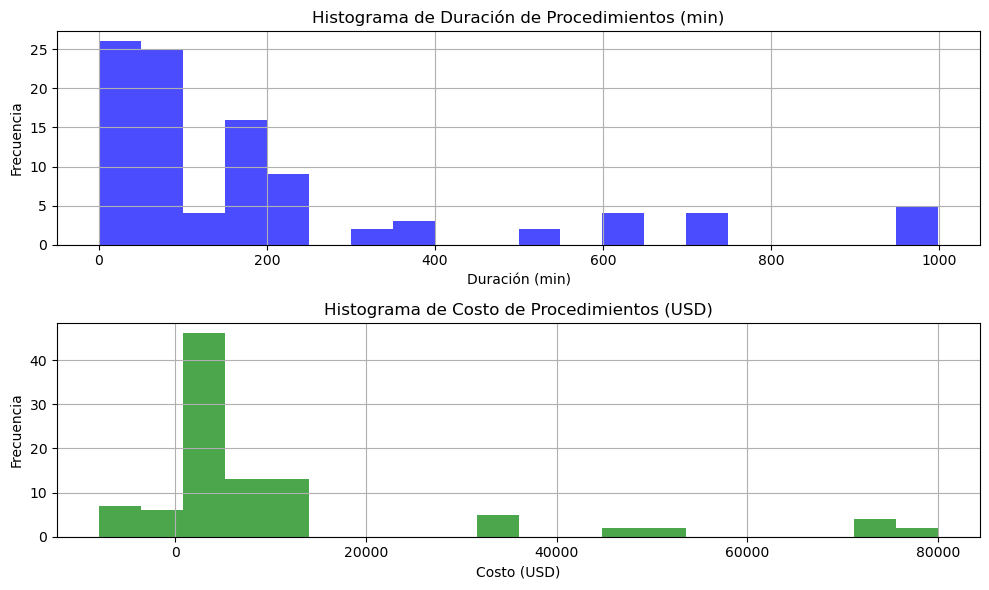

<Figure size 640x480 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt

# Crear un gráfico con dos histogramas
plt.figure(figsize=(10, 6))

# Primer histograma: Duracion (min)
plt.subplot(2, 1, 1)
df['Duracion (min)'].dropna().hist(bins=20, color='blue', alpha=0.7)
plt.title('Histograma de Duración de Procedimientos (min)')
plt.xlabel('Duración (min)')
plt.ylabel('Frecuencia')

# Segundo histograma: Costo (USD)
plt.subplot(2, 1, 2)
df['Costo (USD)'].dropna().hist(bins=20, color='green', alpha=0.7)
plt.title('Histograma de Costo de Procedimientos (USD)')
plt.xlabel('Costo (USD)')
plt.ylabel('Frecuencia')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

# Guardar los gráficos en un archivo
plt.savefig('histogramas_Surgeries.png')

